In [187]:
#Final submission score is 0.67,which needs to be improved.

In [239]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from statistics import variance
from sklearn.feature_selection import VarianceThreshold




print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sampleSubmission.csv']


In [189]:
test = pd.read_csv("../input/test.csv")
train = pd.read_csv("../input/train.csv")

In [190]:
train.sample()


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
6107,6108,2422,117,6,30,-4,421,231,234,136,1328,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6


In [191]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [192]:
#check for missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

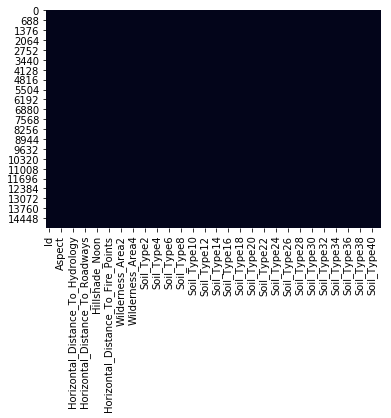

In [193]:
sns.heatmap(train.isnull(),cbar = False)

There are no missing numbers in the map.

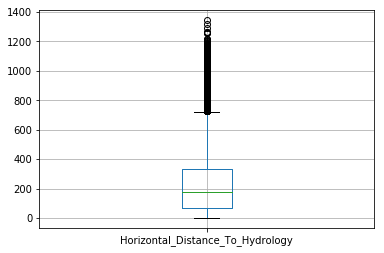

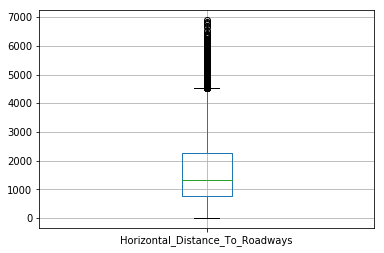

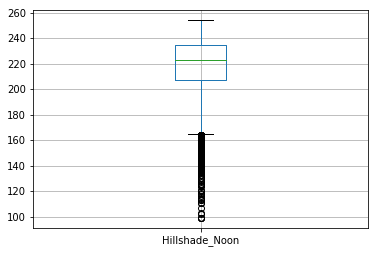

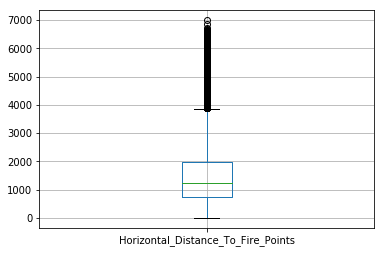

In [194]:
distance=pd.DataFrame(train,columns = ['Horizontal_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
                                      'Hillshade_Noon','Horizontal_Distance_To_Fire_Points'])



for column in distance:
    plt.figure()
    distance.boxplot([column])

In [195]:
#Soil_Type7,Soil_Type15 has 0 standard deviation
#train = train.drop(["Soil_Type7","Soil_Type15"],axis = 1)
#test = test.drop(["Soil_Type7","Soil_Type15"],axis = 1)

In [196]:
#Cover type is the target to be predicted.
#Train test split
x_train,x_test,y_train,y_test=  train_test_split(train.drop('Cover_Type',axis = 1),train['Cover_Type'],test_size = 0.3,random_state = 17)

In [197]:
#Building logistic regression model
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [198]:
#Predicting logistic regression results
logreg.predict(x_test)

array([1, 4, 5, ..., 7, 7, 5])

In [199]:
#Logistic regression test scores
score = logreg.score(x_test, y_test)
print(score)

0.6545414462081128


In [200]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [201]:
tree_model = DecisionTreeClassifier()
ensemble_model = RandomForestClassifier()


In [202]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [203]:
ensemble_model.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [204]:
tree_predict=tree_model.predict(x_test)
tree_model.score(x_test,y_test)

0.7881393298059964

In [205]:
ensemble_predict= ensemble_model.predict(test)
print (ensemble_predict)
ensemble_model.score(x_test,y_test)

[1 1 1 ... 3 3 3]


0.8379629629629629

In [206]:
#of the 3 algorithms applied to the dataset,ensemble model works better with a score of 0.84


In [207]:
submission.shape

(565892, 2)

In [208]:
x_test.shape
test.shape


(565892, 55)

In [209]:
#current public score is 0.66,this should be improved
#checking the variance of each feature
train1 = train
test1 = test
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(train1)

train1.head(40)

#this is based on this article ,https://scikit-learn.org/stable/modules/feature_selection.html
#could see no rows being removed in the data set,as all of them have valid values,non null.


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
5,6,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
6,7,2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
7,8,2605,49,4,234,7,573,222,230,144,6228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
8,9,2617,45,9,240,56,666,223,221,133,6244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
9,10,2612,59,10,247,11,636,228,219,124,6230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [210]:
tree_model.fit

<bound method DecisionTreeClassifier.fit of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>

In [211]:
tree_model.predict(test1)
tree_model.score(x_test,y_test)

0.7881393298059964

In [212]:
pd.DataFrame([train.mean(), train.std(), train.var()], index=['Mean', 'Std. dev', 'Variance'])


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Mean,7.560500e+03,2749.322553,156.676653,16.501587,227.195701,51.076521,1.714023e+03,212.704299,218.965608,135.091997,1.511147e+03,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
Std. dev,4.364912e+03,417.678187,110.085801,8.453927,210.075296,61.239406,1.325066e+03,30.561287,22.801966,45.895189,1.099936e+03,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
Variance,1.905246e+07,174455.068186,12118.883667,71.468878,44131.629864,3750.264863,1.755801e+06,933.992256,519.929633,2106.368347,1.209860e+06,0.181314,0.031916,0.243601,0.213607,0.022929,0.039509,0.059580,0.052649,0.010794,0.041144,0.0,0.000066,0.000661,0.121605,0.026133,0.014789,0.030492,0.011053,0.0,0.007483,0.038840,0.003953,0.003033,0.009109,0.001057,0.022298,0.047563,0.016710,0.000066,0.003559,0.000991,0.000595,0.078098,0.045654,0.021477,0.043555,0.039084,0.001453,0.006701,0.000661,0.002244,0.045833,0.041567,0.029438,4.000265


In [213]:
#Getting feature importance after running the data through a ensemble model classifier

In [214]:
x=pd.DataFrame(ensemble_model.feature_importances_,
             index=x_train.columns, columns=['Importance']).sort_values(
    by='Importance', ascending=False)[:10]
print(x)

                                    Importance
Elevation                             0.220286
Horizontal_Distance_To_Roadways       0.091881
Id                                    0.083733
Horizontal_Distance_To_Fire_Points    0.063105
Horizontal_Distance_To_Hydrology      0.061978
Aspect                                0.049151
Hillshade_9am                         0.045113
Hillshade_3pm                         0.040914
Vertical_Distance_To_Hydrology        0.040449
Hillshade_Noon                        0.040349


In [215]:
#Modelling based on important features alone
train2 = train
test2 = test
train_imp = train2[['Id','Elevation','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points',
                    'Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Hillshade_9am',
                    'Aspect','Hillshade_3pm',
                    'Wilderness_Area4','Cover_Type']]



In [216]:
x_train_imp,x_test_imp,y_train_imp,y_test_imp=  train_test_split(train_imp.drop('Cover_Type',axis = 1),train_imp['Cover_Type'],
                                                                 test_size = 0.3,random_state = 17)


In [217]:
logreg1 = LogisticRegression()
logreg1.fit(x_train_imp,y_train_imp)
logreg1.predict(x_test_imp)
logreg1.score(x_test_imp,y_test_imp)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5227072310405644

In [218]:
tree_model1 =DecisionTreeClassifier()
tree_model1.fit(x_train_imp,y_train_imp)
tree_predict=tree_model1.predict(x_test_imp)
tree_model1.score(x_test_imp,y_test_imp)

0.7652116402116402

In [219]:
ensemble_1 = RandomForestClassifier()
ensemble_1.fit(x_train_imp,y_train_imp)
ensemble_predict= ensemble_1.predict(x_test_imp)
print (ensemble_predict)
ensemble_1.score(x_test_imp,y_test_imp)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1 4 5 ... 7 7 5]


0.8234126984126984

In [220]:
pd.DataFrame(tree_model.feature_importances_,index = x_train.columns,columns=['Importance']).sort_values(
    by = 'Importance',ascending = False)[:10]

,Importance
Elevation,0.405928
Id,0.080655
Horizontal_Distance_To_Roadways,0.077484
Horizontal_Distance_To_Fire_Points,0.061759
Hillshade_9am,0.059813
Horizontal_Distance_To_Hydrology,0.059609
Aspect,0.042581
Vertical_Distance_To_Hydrology,0.031106
Hillshade_Noon,0.027186
Hillshade_3pm,0.026668


In [221]:
#Both the models have same important features,also these important features completely ignores the soil type feature.
#This should be included,except Soil_Type7,Soil_Type15 has lower standard deviation.



In [222]:
#Modelling based on important features alone
train = train.drop(["Soil_Type7","Soil_Type15","Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Slope",
                  "Hillshade_Noon"],axis = 1)
test = test.drop(["Soil_Type7","Soil_Type15","Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Slope",
                  "Hillshade_Noon"],axis = 1)
train3 = train
test3 = test

train[:10]
#train_imp = train3[train]

#[['Id','Elevation','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points',
 #                   'Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Hillshade_9am',
  #                  'Aspect','Hillshade_3pm',
   #                 'Wilderness_Area4','Cover_Type']]

,Id,Elevation,Aspect,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,258,0,510,221,148,6279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,212,-6,390,220,151,6225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,268,65,3180,234,135,6121,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,242,118,3090,238,122,6211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,153,-1,391,220,150,6172,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
5,6,2579,132,300,-15,67,230,140,6031,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
6,7,2606,45,270,5,633,222,138,6256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
7,8,2605,49,234,7,573,222,144,6228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
8,9,2617,45,240,56,666,223,133,6244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
9,10,2612,59,247,11,636,228,124,6230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [223]:
x_train_3,x_test_3,y_train_3,y_test_3=  train_test_split(train3.drop('Cover_Type',axis = 1),train3['Cover_Type'],
                                                                 test_size = 0.3,random_state = 17)


In [224]:
logreg2 = LogisticRegression()
logreg2.fit(x_train_3,y_train_3)
logreg2.predict(x_test_3)
logreg2.score(x_test_3,y_test_3)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6086860670194003

In [234]:
tree_model2 =DecisionTreeClassifier()
tree_model2.fit(x_train_3,y_train_3)
tree_predict2=tree_model2.predict(x_test_3)
tree_model2.score(x_test_3,y_test_3)
tree_test_pred = tree_model2.predict(test)

In [226]:
ensemble_2 = RandomForestClassifier()
ensemble_2.fit(x_train_3,y_train_3)
ensemble_predict2= ensemble_2.predict(x_test_3)
print (ensemble_predict2)
ensemble_2.score(x_test_3,y_test_3)
ensemble_test_pred = ensemble_2.predict(test)


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1 4 5 ... 7 7 5]


In [227]:
#Naive Bayes Model

In [228]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_3,y_train_3)
nb.predict(x_test_3)
nb.score(x_test_3,y_test_3)

0.6371252204585538

In [229]:
#SGDClassifier,very low performance

In [230]:
sgd = SGDClassifier(loss = 'modified_huber',shuffle = True,random_state = 171)
sgd.fit(x_train_3,y_train_3)
sgd.predict(x_train_3)
sgd.score(x_test_3,y_test_3)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.26940035273368607

In [231]:
sgd = SGDClassifier(loss = 'log',shuffle = True,random_state = 171)
sgd.fit(x_train_3,y_train_3)
sgd.predict(x_train_3)
sgd.score(x_test_3,y_test_3)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.26940035273368607

In [232]:
sgd = SGDClassifier(shuffle = True,random_state = 171)
sgd.fit(x_train_3,y_train_3)
sgd.predict(x_train_3)
sgd.score(x_test_3,y_test_3)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.2724867724867725

In [233]:
submission = pd.DataFrame({'Id':test.Id,'Cover_Type':ensemble_test_pred})
submission.head()
submission.to_csv('submission.csv',index = False)

In [235]:
submission_tree = pd.DataFrame({'Id':test.Id,'Cover_Type':tree_test_pred})
submission_tree.head()
submission_tree.to_csv('submission2.csv',index = False)

In [240]:
#Extra tree classifier is a tree based model for classification problems
et = ExtraTreeClassifier()
et.fit(x_train_3,y_train_3)
et.predict(x_train_3)
et.score(x_test_3,y_test_3)

0.7396384479717814

In [241]:
from sklearn.semi_supervised import LabelPropagation
lb = LabelPropagation()
lb.fit(x_train_3,y_train_3)
lb.predict(x_train_3)
lb.score(x_test_3,y_test_3)

/opt/conda/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


0.13999118165784832

In [242]:
from sklearn.neighbors import KNeighborsClassifier
knng =KNeighborsClassifier()
knng.fit(x_train_3,y_train_3)
knng.predict(x_train_3)
knng.score(x_test_3,y_test_3)

0.8024691358024691